In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note: Plotting code written with assistance from Google's Gemini

### Baseline CNN models

Index(['index', 'Unnamed: 0', 'totalims', 'correctims', 'nims_snow_severe',
       'correct_snow_severe', 'nims_snow', 'correct_snow', 'nims_wet',
       'correct_wet', 'nims_dry', 'correct_dry', 'nims_poor_viz',
       'correct_poor_viz', 'ok', 'exp_desc', 'exp_details', 'rundatetime',
       'overall', 'perc_dry', 'perc_poor_viz', 'perc_snow', 'perc_snow_severe',
       'perc_wet', 'avg_recall'],
      dtype='object')


,index,Unnamed: 0,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,correct_wet,...,rundatetime,overall,perc_dry,perc_poor_viz,perc_snow,perc_snow_severe,perc_wet,avg_recall,arch,desc
11,11,11,107445,68983,7635,5669,14945,8370,42290,28445,...,2025-06-29 04:19:28.258097,0.642031,0.608421,0.738579,0.560054,0.742502,0.672618,0.664435,densenet,Transfer learn: AST | Aug: N
29,29,29,107445,69292,7635,5778,14945,8508,42290,28059,...,2025-07-01 14:24:54.035309,0.644907,0.620737,0.734208,0.569287,0.756778,0.663490,0.668900,densenet,Transfer learn: AST | Aug: Y
5,5,5,107445,70141,7635,5486,14945,8230,42290,29504,...,2025-06-29 03:31:56.266625,0.652808,0.618658,0.745792,0.550686,0.718533,0.697659,0.666266,densenet,Transfer learn: GEN | Aug: N


[[0.6528084136069617, 0.6420308064591186, 0.6015356694122574, 0.6584392014519056, 0.6449066964493462, 0.6228768206989622], [0.6114570245241752, 0.6029596537763507, 0.5514542323979711, 0.6108892921960073, 0.6048955279445297, 0.5980175903950858], [0.6784215179859463, 0.6630462096886779, 0.5618130206151984, 0.6728000372283494, 0.6610544929964167, 0.5896132905207315], [0.683233282144353, 0.6771836753687933, 0.5514542323979711, 0.6912559914374796, 0.6805621480757597, 0.5811996835590302], [0.6030341104751268, 0.5290334589790125, 0.5039043231420727, 0.6037135278514589, 0.5623062962445903, 0.5269952068500163], [0.6111685048164177, 0.6011913071804179, 0.5852482665549816, 0.6092140164735446, 0.5976546139885522, 0.6228768206989622]]
['densenet', 'incep', 'mobilenet', 'resnet', 'vgg16', 'xcep']
[['Transfer learn: GEN | Aug: N', 'Transfer learn: AST | Aug: N', 'Transfer learn: None | Aug: N', 'Transfer learn: GEN | Aug: Y', 'Transfer learn: AST | Aug: Y', 'Transfer learn: None | Aug: Y'], ['Transfe

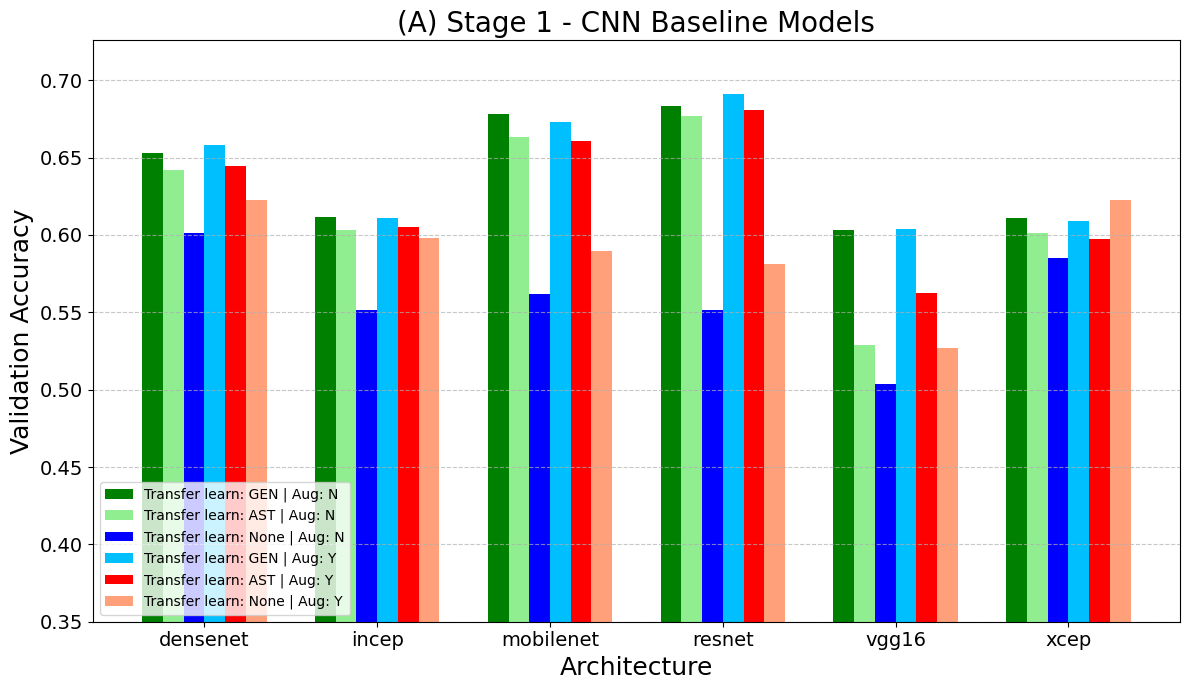

In [56]:
### PREPARE DATA
df = pd.read_csv("/home/csutter/DRIVE-clean/CNN/data_results/results_by_exp_innerVal_metrics.csv")

df_bl = df[0:36].reset_index()
print(df_bl.columns)


# grab arch
archs = []
tls = []
augs = []
# asts = []
for i in range(0,len(df_bl)):
    a = df_bl["exp_details"][i]
    # arch
    a1 = a[3:] # remove the _A_
    end = a1.find("_") # find the next _ which is the end of the arch name
    arch = a1[:end]
    archs.append(arch)
    # TRLE
    # print(a)
    beg1 = a.find("TRLE")
    # print(beg1)
    b1 = a[beg1:]
    end1 = b1.find("_")
    trle = b1[4:end1]
    # print(trle)
    if trle == "True":
        beg1 = a.find("AST")
        c1 = a[beg1:]
        end1 = c1.find("_")
        ast = c1[3:end1]
        # asts.append(ast)
        # print(ast)
        if ast == "True":
            tls.append("Transfer learn: AST")
        else:
            tls.append("Transfer learn: GEN")
    else:
        tls.append("Transfer learn: None")
    # TRLE
    beg1 = a.find("Aug")
    d1 = a[beg1:]
    # end1 = d1.find("_")
    aug = d1[3:]
    # print(aug)
    if aug == "True":
        augs.append("Aug: Y")
    else:
        augs.append("Aug: N")

descs = []
for i in range(0, len(tls)):
    d = f"{tls[i]} | {augs[i]}"
    descs.append(d)


# print(archs)
# print(descs)


df_bl["arch"] = archs
df_bl["desc"] = descs

# display(df_bl.head(4))

df_bl_sorted = df_bl.sort_values(["arch","desc"])

# there are 6 groups (of archs) and 6 data points (descs) within each arch -- to make the 36 total models
# the df is sorted, so now just go through and collect lists of lists in the order needed for plotting



display(df_bl_sorted.head(3))

# organize in lists of lists for plotting
data_grouped= []
groupnames = []
barnames = [] # will be a list of lists (just like the data_grouped) but this inner list is of desc names... just make sure each one is the same order, which they should be bc data was already sorted accordingly, but this is just to double check that the bars are in the right order for each arch
for a in np.unique(archs):
    groupnames.append(a)
    df_arch = df_bl[df_bl["arch"]==a].reset_index()
    data_for_that_arch = list(df_arch["overall"])
    # print(data_for_that_arch)
    data_grouped.append(data_for_that_arch)
    # just to double check.. 
    descs_for_that_arch = list(df_arch["desc"])
    barnames.append(descs_for_that_arch)


print(data_grouped)
print(groupnames)
print(barnames)


#### MAKE PLOTS

data = np.array(data_grouped)
# Group labels
group_labels = groupnames

# Model labels for the legend
# after checking all the barnames are the same, just grab one of them for making the key
model_labels = barnames[0]#[f'Model {i}' for i in barnames[0]] 

# Colors for each model
colors = ["green", "lightgreen", "blue", "deepskyblue", "red", "lightsalmon"] 

# # Colors for each model
# colors = plt.cm.get_cmap('tab10', 6) # Using a colormap for distinct colors

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figure size as needed

# Bar width
bar_width = 0.12

# Positions for the groups on the x-axis
group_positions = np.arange(len(group_labels))

# Plotting the bars for each model within each group
for i in range(data.shape[1]): # Iterate through models (columns of data)
    # Calculate the x-position for each set of bars within a group
    # This offsets each model's bars so they appear side-by-side
    offset = (i - (data.shape[1] - 1) / 2) * bar_width
    ax.bar(group_positions + offset, data[:, i], bar_width, label=model_labels[i], color=colors[i])

# Customize the chart
ax.set_xlabel('Architecture', fontsize=18)
ax.set_ylabel('Validation Accuracy', fontsize=18)
ax.set_title('(A) Stage 1 - CNN Baseline Models', fontsize=20)
ax.set_xticks(group_positions) # Set x-ticks at the center of each group
ax.set_xticklabels(group_labels, fontsize=14) # Set group labels
ax.tick_params(axis='y', labelsize=14) # Adjust y-axis tick label size

# Set the y-axis to start at 0
ax.set_ylim(bottom=0.35)

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add the legend to the bottom left corner
ax.legend(loc='lower left', bbox_to_anchor=(0, 0))

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
df_ht = df[36:].reset_index()

# Not plotting results from HT... not worth it, very small differences and small net gain, not super insightful for paper. Maybe for dissertation

### Plots for downstream hyp tuning

In [58]:
df = pd.read_csv("/home/csutter/DRIVE-clean/downstream/data_results/results_by_exp_innerVal.csv")
df.head(4)

,Unnamed: 0,exp_desc,exp_details,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,correct_wet,nims_dry,correct_dry,nims_poor_viz,correct_poor_viz,ok
0,0,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80100,7635,6091,14945,10848,42290,29997,38000,29683,4575,3481,97472
1,1,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80294,7635,6130,14945,10695,42290,29947,38000,30020,4575,3502,97540
2,2,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80141,7635,6096,14945,10740,42290,29710,38000,30090,4575,3505,97553
3,3,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80125,7635,6065,14945,10554,42290,30105,38000,29885,4575,3516,97512


In [59]:
df = pd.read_csv("/home/csutter/DRIVE-clean/downstream/data_results/results_by_exp_innerVal.csv")

df["overall"] = df["correctims"]/df["totalims"]


for c in ["dry", "poor_viz", "snow", "snow_severe", "wet"]:
    df[f"perc_{c}"] = df[f"correct_{c}"]/df[f"nims_{c}"]



df["avg_recall"] = df[["perc_dry", "perc_poor_viz", "perc_snow", "perc_snow_severe", "perc_wet"]].mean(axis = 1)

importances = [1,2,2,3,1.5]

cols = ["perc_snow_severe", "perc_snow", "perc_wet", "perc_dry", "perc_poor_viz"]
values = df[cols].values
df["weighted_avg_recall"] = (values * importances).sum(axis=1) / sum(importances)

unique_BL = np.unique(df["exp_desc"])

print(unique_BL)




### The way I originally did it with selecting top one model PER each baseline model
for bl in unique_BL:
    dfsub = df[df["model_BL_desc"]==bl]

    # subset for each downstream classif model too
    for alg in ["logistic", "gnb", "svm", "DNN", "rf"]:
        if 
    if len(dfsub)>1: # only look at the selected 4 BL models, not all the other 32 with only the one BL run exp
        print(len(dfsub))
        top4_avgrecall = dfsub.sort_values("avg_recall", ascending=False)[0:5] # since only 16 HT are run, select from top 5 (roughly 1/3)
        selected1 = top4_avgrecall.sort_values("overall", ascending=False)[0:1] # grab the top 1
        print(bl)
        display(selected1)
        print(selected1["exp_details"])


# # Decision: index 1507 showed up in a variety of different weighted-importances (when we tried these below), and replaced the initial top 10 with weighted recall rather than just plain average. Motivation to keep it simple and just move forward with the simplest -- top 10 avg recall, then take the max overall from that. Top models are all pretty similar, anyway. 
# top10_avgrecall = df.sort_values("avg_recall", ascending=False)[0:10]
# # top10_avgrecall = df.sort_values("weighted_avg_recall", ascending=False)[0:10] # just for testing. Tried: 
# # importances = [1,2,2,3,1.5]
# # importances = [0.9,1.2,1.2,1.5,1]

# selected4 = top10_avgrecall.sort_values("overall", ascending=False)[0:1]

# display(selected4)

# print(selected4["exp_details"])
# print(np.max(selected4["perc_snow"]))

['A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E75_AugFalse'
 'A_resnet_TRLETrue_ASTFalse_L20_001_DR0_4_E75_AugTrue'
 'A_resnet_TRLETrue_ASTFalse_L20_1_DR0_2_E75_AugFalse'
 'A_resnet_TRLETrue_ASTTrue_L20_1_DR0_2_E75_AugTrue']


In [55]:
df.head(3)

,Unnamed: 0,exp_desc,exp_details,totalims,correctims,nims_snow_severe,correct_snow_severe,nims_snow,correct_snow,nims_wet,correct_wet,nims_dry,correct_dry,nims_poor_viz,correct_poor_viz,ok
0,0,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80100,7635,6091,14945,10848,42290,29997,38000,29683,4575,3481,97472
1,1,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80294,7635,6130,14945,10695,42290,29947,38000,30020,4575,3502,97540
2,2,A_mobilenet_TRLETrue_ASTFalse_L21e-05_DR0_4_E7...,"DNN_{'hidden_layers': 1, 'hidden_units': '[16]...",107445,80141,7635,6096,14945,10740,42290,29710,38000,30090,4575,3505,97553
